## Importing the libraries

In [96]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
from astropy.io import ascii

## Importing the dataset

In [110]:
from Preprocessor4 import get_combined_dataset
from Preprocessor4 import get_single_dataset
training_set = get_combined_dataset("training_data/Typ2_intrapoliert/training", 4, 12)
X_train = training_set.iloc[:, 2:].values
y_train = training_set.iloc[:, 1].values
test_set = get_combined_dataset("training_data/Typ1_intrapoliert/test", 1, 3)
X_test = test_set.iloc[:, 2:].values
y_test = test_set.iloc[:, 1].values

## Training the Neural Network model

In [259]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential(
    [
        layers.Dense(10, activation="relu", kernel_initializer='he_normal', input_shape=(3,), name="layer1"),
        layers.Dense(8, activation="relu", kernel_initializer='he_normal', name="layer2"),
        layers.Dense(1, activation='relu', name="layer3"),
    ]
)
model.compile(loss='mean_absolute_error', optimizer=tf.keras.optimizers.Adam(0.01))

In [260]:
model.fit(X_train, y_train, batch_size=256, epochs=200)

Epoch 1/200
104/104 [==============================] - 0s 822us/step - loss: 2.2527
Epoch 2/200
104/104 [==============================] - 0s 822us/step - loss: 1.3896
Epoch 3/200
104/104 [==============================] - 0s 822us/step - loss: 1.0742
Epoch 4/200
104/104 [==============================] - 0s 821us/step - loss: 0.9400
Epoch 5/200
104/104 [==============================] - 0s 973us/step - loss: 0.8226
Epoch 6/200
104/104 [==============================] - 0s 758us/step - loss: 0.7565
Epoch 7/200
104/104 [==============================] - 0s 822us/step - loss: 0.6161
Epoch 8/200
104/104 [==============================] - 0s 670us/step - loss: 0.5452
Epoch 9/200
104/104 [==============================] - 0s 670us/step - loss: 0.5476
Epoch 10/200
104/104 [==============================] - 0s 670us/step - loss: 0.4524
Epoch 11/200
104/104 [==============================] - 0s 910us/step - loss: 0.4359
Epoch 12/200
104/104 [==============================] - 0s 822us/step - lo

## Predicting the Test set results on independent test set

In [261]:
y_pred = model.predict(X_test)

In [262]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(mse)

0.2595977057664153


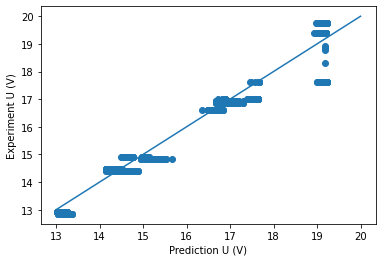

In [263]:
plt.scatter(y_pred, y_test)
plt.xlabel("Prediction U (V)")
plt.ylabel("Experiment U (V)")
plt.plot([13, 20], [13, 20])
plt.show()

In [264]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9322890932458454

In [265]:
from sklearn.metrics import mean_squared_error
import math
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)
print(rmse)

0.5095073166956636


In [266]:
from sklearn.metrics import mean_absolute_error
mape = mean_absolute_error(y_test, y_pred)*100
print(mape)

31.403093962306173


In [267]:
np.savetxt("nn2_u_test_train2test1_originalH2.txt", y_test)

In [268]:
np.savetxt("nn2_u_pred_train2test1_originalH2.txt", y_pred)